In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-16-09_43_47/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

19001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

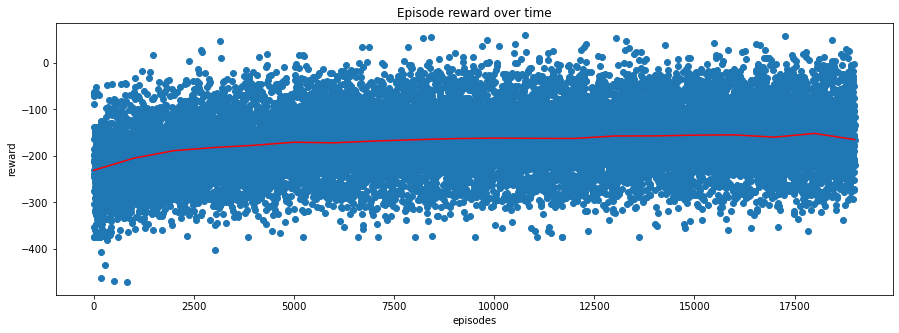

Maximum: 59.599999999999994
Average: -170.6657544339813
Moving Average (simple): {0: -230.9110889110889, 1000: -204.9030969030969, 2000: -188.66313686313686, 3000: -181.9122877122877, 4000: -177.1214785214785, 5000: -170.52087912087913, 6000: -171.72567432567433, 7000: -167.93786213786214, 8000: -165.1956043956044, 9000: -162.6939060939061, 10000: -161.63056943056944, 11000: -162.1152847152847, 12000: -162.37802197802196, 13000: -157.05154845154846, 14000: -156.87892107892108, 15000: -155.27012987012986, 16000: -154.6899100899101, 17000: -159.53146853146853, 18000: -151.5130869130869, 19000: -164.79999999999998}
Moving Average: []
Minimum: -472.40000000000003


In [5]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

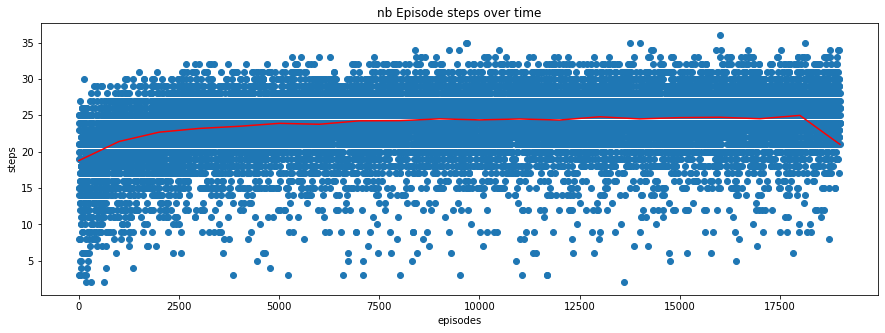

Maximum: 36
Average: 23.77032787748013
Moving Average (simple): {0: 18.77722277722278, 1000: 21.395604395604394, 2000: 22.677322677322678, 3000: 23.191808191808192, 4000: 23.487512487512486, 5000: 23.89210789210789, 6000: 23.767232767232766, 7000: 24.23876123876124, 8000: 24.263736263736263, 9000: 24.50849150849151, 10000: 24.371628371628372, 11000: 24.48951048951049, 12000: 24.352647352647352, 13000: 24.793206793206792, 14000: 24.503496503496503, 15000: 24.681318681318682, 16000: 24.72927072927073, 17000: 24.52747252747253, 18000: 24.986013986013987, 19000: 21}
Moving Average: ['+13% (21.395604395604394 | 13%)', '+5% (22.677322677322678 | 20%)', '+2% (23.191808191808192 | 23%)', '+1% (23.487512487512486 | 25%)', '+1% (23.89210789210789 | 27%)', '0% (23.767232767232766 | 26%)', '+1% (24.23876123876124 | 29%)', '+0% (24.263736263736263 | 29%)', '+1% (24.50849150849151 | 30%)', '0% (24.371628371628372 | 29%)', '+0% (24.48951048951049 | 30%)', '0% (24.352647352647352 | 29%)', '+1% (24.793

In [6]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

In [7]:
#plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")